In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\BIS_COM\과제\loan_data.csv")

In [2]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
data['credit.policy'] = data['credit.policy'].apply(lambda x :'can' if x == 1  else 'cannot')
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,can,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,can,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,can,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,can,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,can,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [16]:
data1 = data.copy
data1 = data[data['days.with.cr.line']<=5730.00]
num_cols = [x for x in data1.columns if data1[x].dtype in ['int64', 'float64']]
data1[num_cols].describe()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,7186.000000,7186.000000,7186.000000,7186.000000,7186.000000,7186.000000,7186.000000,7186.000000,7186.000000,7186.000000,7186.000000,7186.000000
mean,0.124034,304.560419,10.848998,12.538407,706.671584,3427.076729,12915.084470,47.242682,1.607431,0.144030,0.055107,0.163373
std,0.026094,198.175318,0.595538,6.880587,35.665899,1322.217734,20494.534974,28.775623,2.231911,0.516119,0.249196,0.369732
min,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.107100,160.457500,10.491274,7.120000,682.000000,2400.041667,2698.000000,23.700000,0.000000,0.000000,0.000000,0.000000
50%,0.125300,259.080000,10.839581,12.620000,702.000000,3510.000000,7358.500000,47.000000,1.000000,0.000000,0.000000,0.000000
75%,0.141100,405.250000,11.225243,17.927500,732.000000,4470.041667,15459.500000,71.000000,2.000000,0.000000,0.000000,0.000000
max,0.216400,940.140000,14.528354,29.950000,817.000000,5730.000000,374487.000000,119.000000,33.000000,13.000000,5.000000,1.000000


# EDA

In [5]:
num_cols = [x for x in data.columns if data[x].dtype in ['int64', 'float64']]
data[num_cols].describe()

,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
obj_cols = [x for x in data.columns if data[x].dtype in ['O']]
data[obj_cols].describe()

,credit.policy,purpose
count,9578,9578
unique,2,7
top,can,debt_consolidation
freq,7710,3957


In [7]:
for x in obj_cols :
    y = np.unique(data[x].astype(str))
    print('-'*50)
    print('col : {}, n_unique : {}, unique : {}'.format(x,len(y),y))

--------------------------------------------------
col : credit.policy, n_unique : 2, unique : ['can' 'cannot']
--------------------------------------------------
col : purpose, n_unique : 7, unique : ['all_other' 'credit_card' 'debt_consolidation' 'educational'
 'home_improvement' 'major_purchase' 'small_business']


--------------------------------------------------
col :  credit.policy


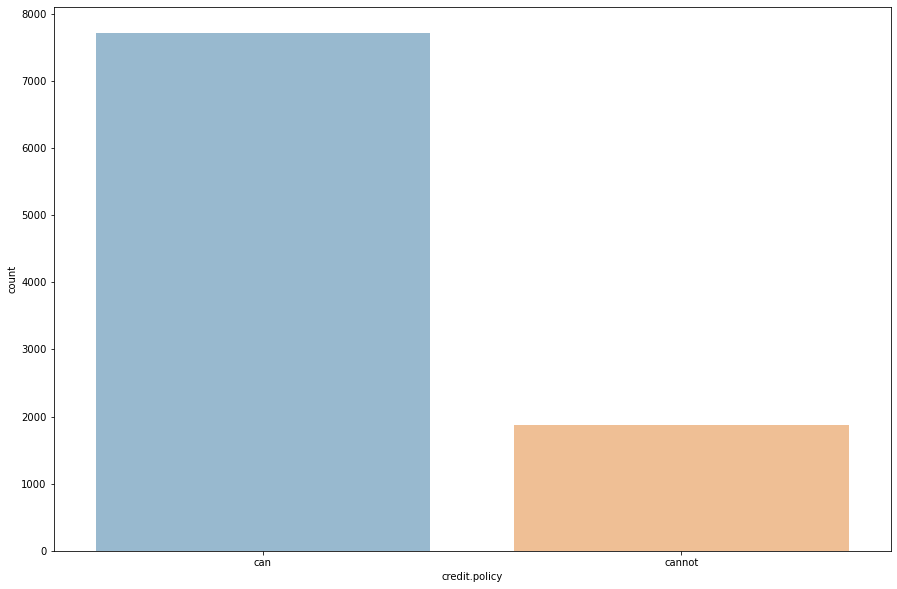

--------------------------------------------------
col :  purpose


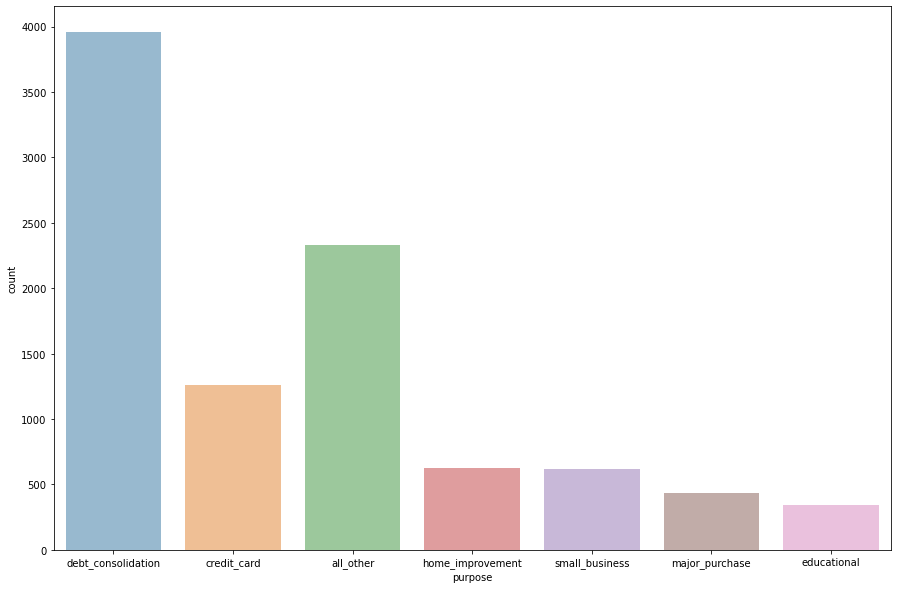

--------------------------------------------------
col :  int.rate


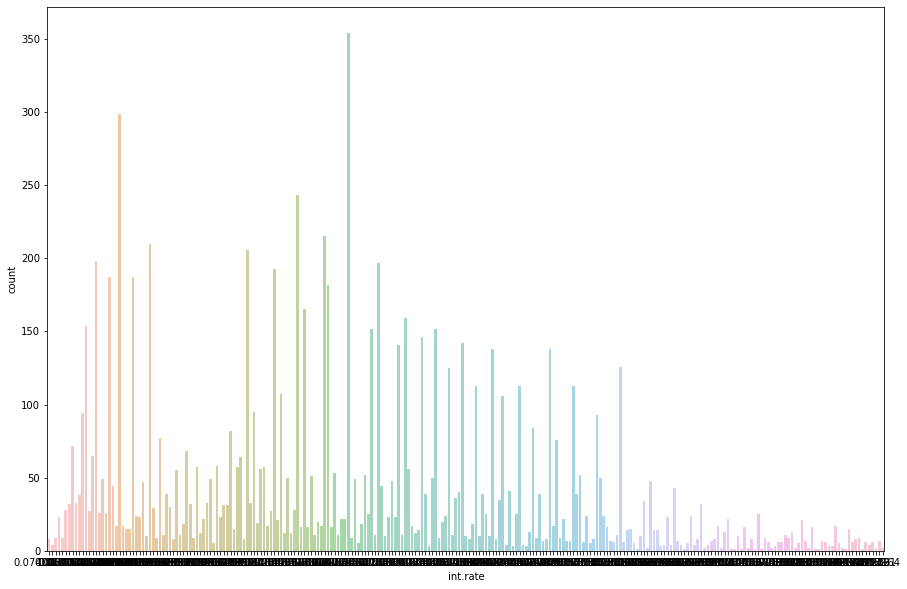

--------------------------------------------------
col :  installment


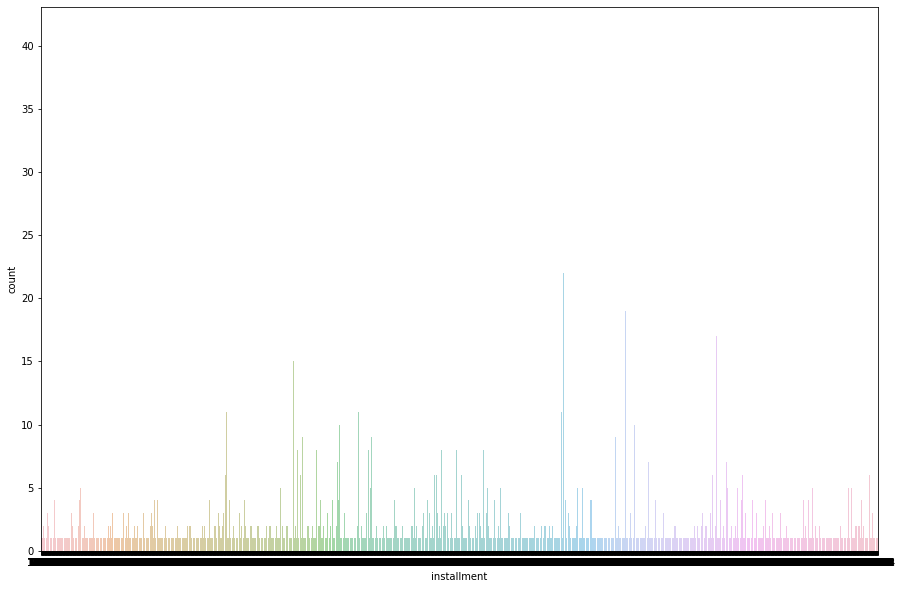

--------------------------------------------------
col :  log.annual.inc


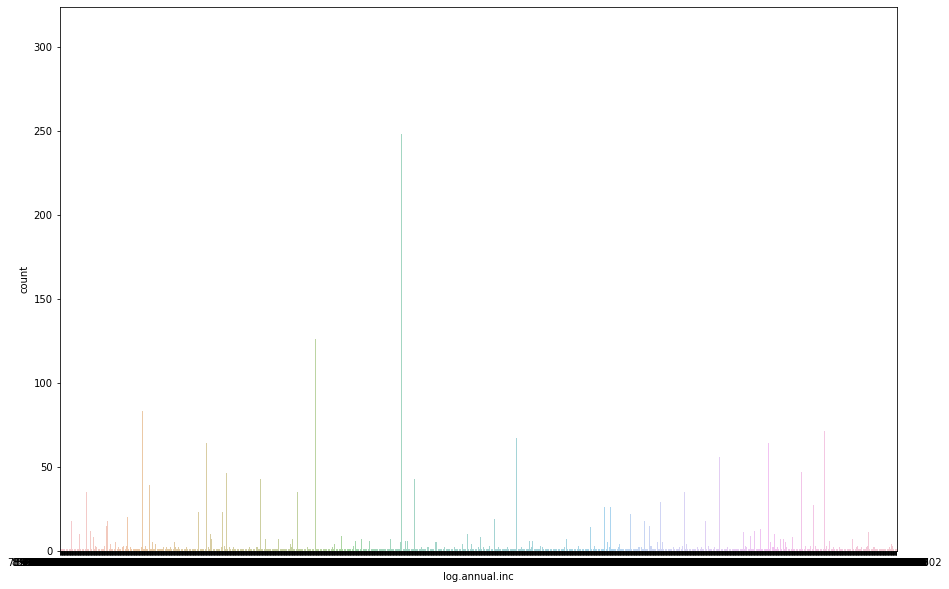

--------------------------------------------------
col :  dti


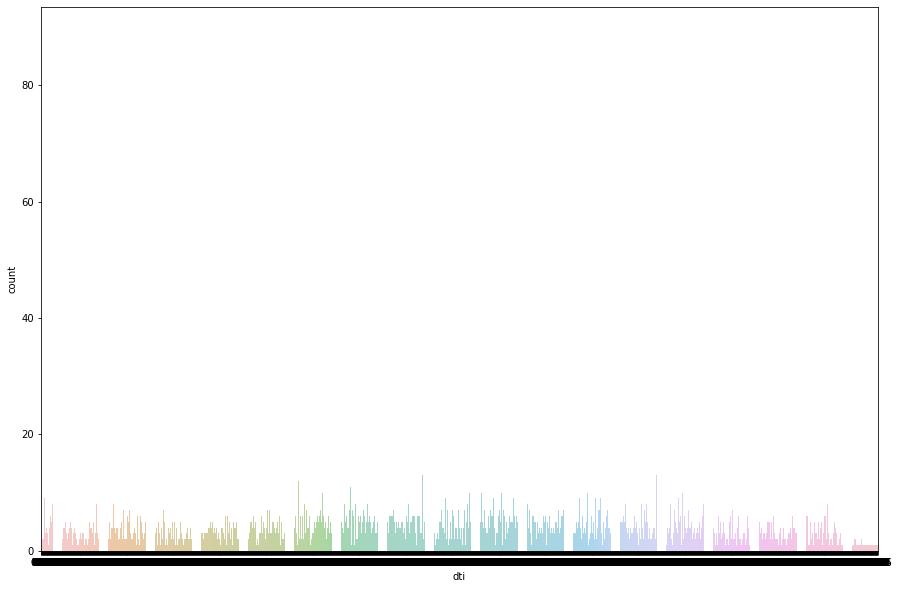

--------------------------------------------------
col :  fico


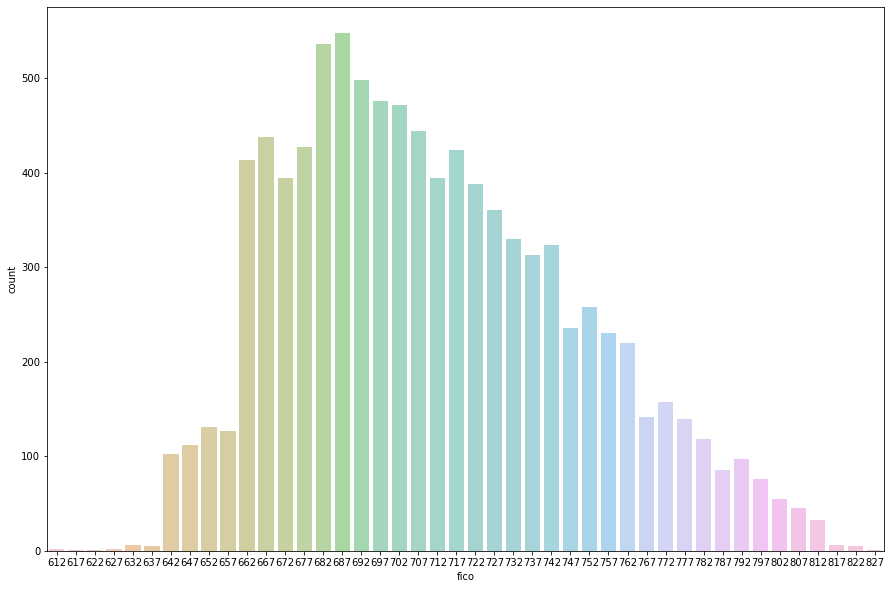

--------------------------------------------------
col :  days.with.cr.line


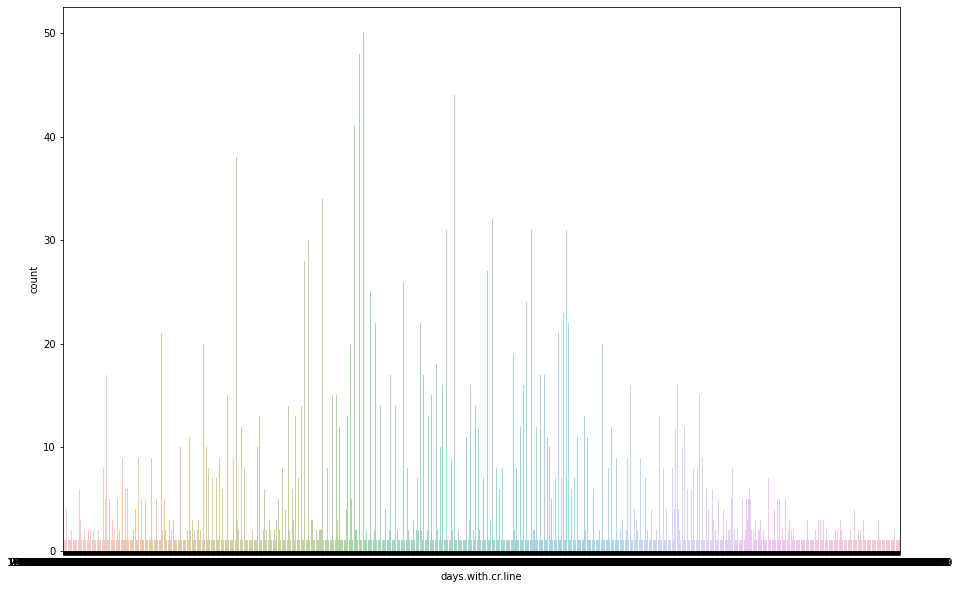

--------------------------------------------------
col :  revol.bal


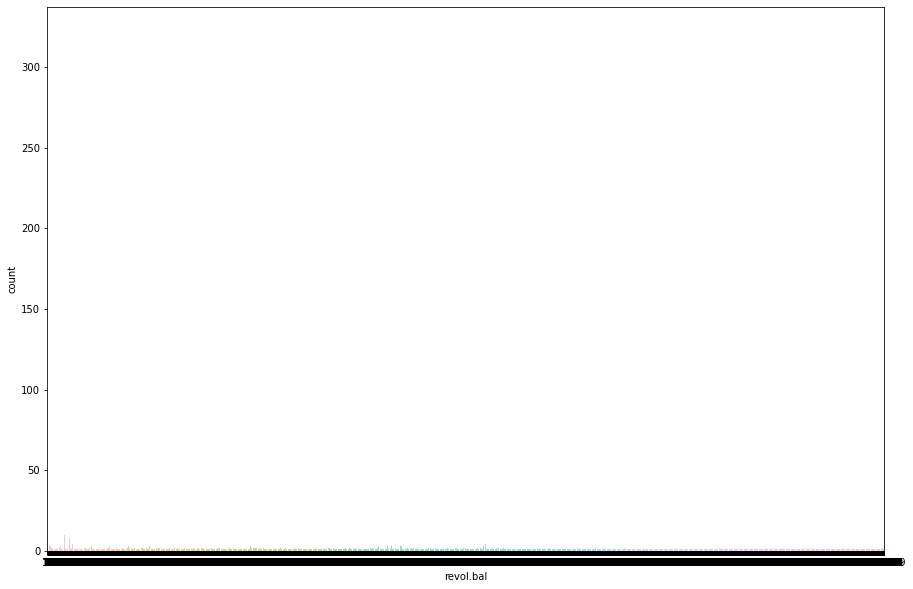

--------------------------------------------------
col :  revol.util


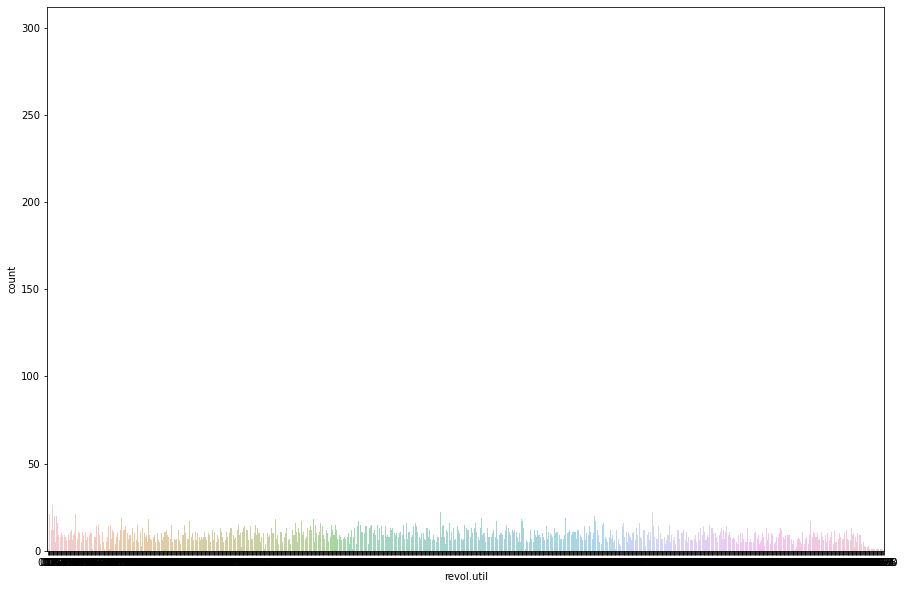

--------------------------------------------------
col :  inq.last.6mths


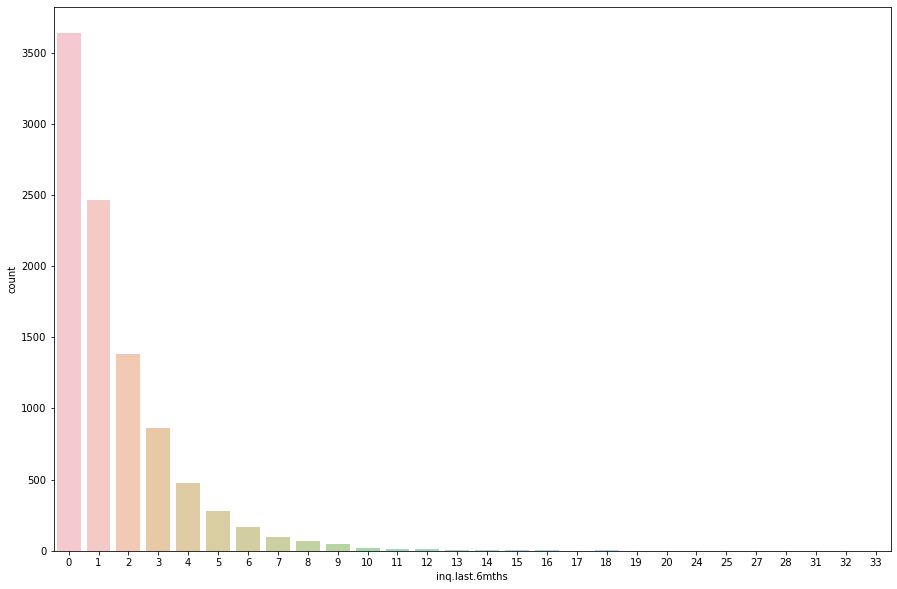

--------------------------------------------------
col :  delinq.2yrs


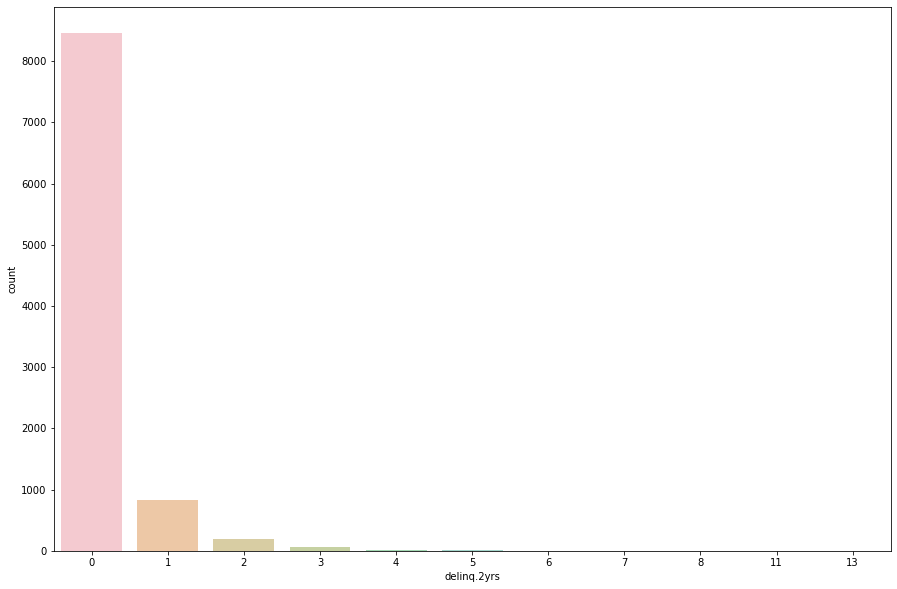

--------------------------------------------------
col :  pub.rec


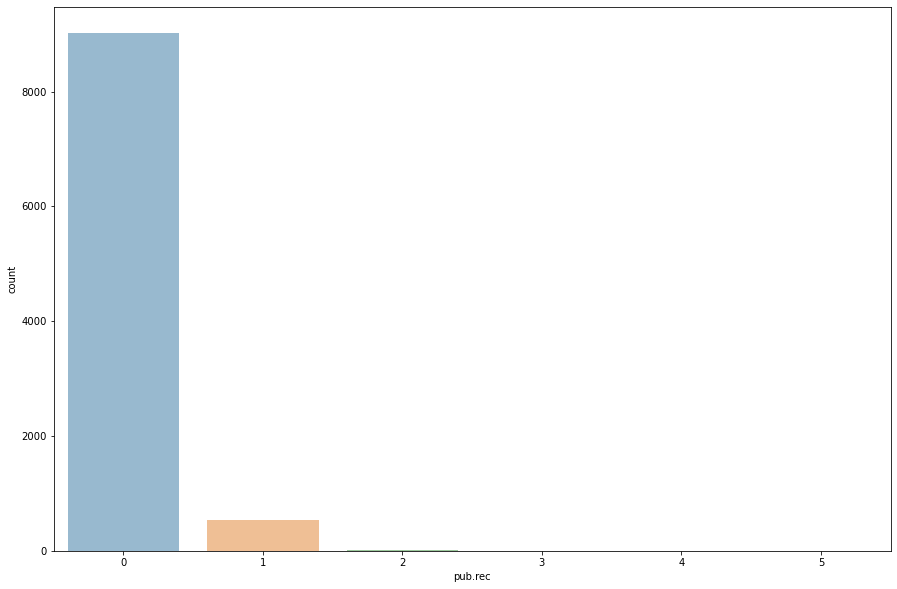

--------------------------------------------------
col :  not.fully.paid


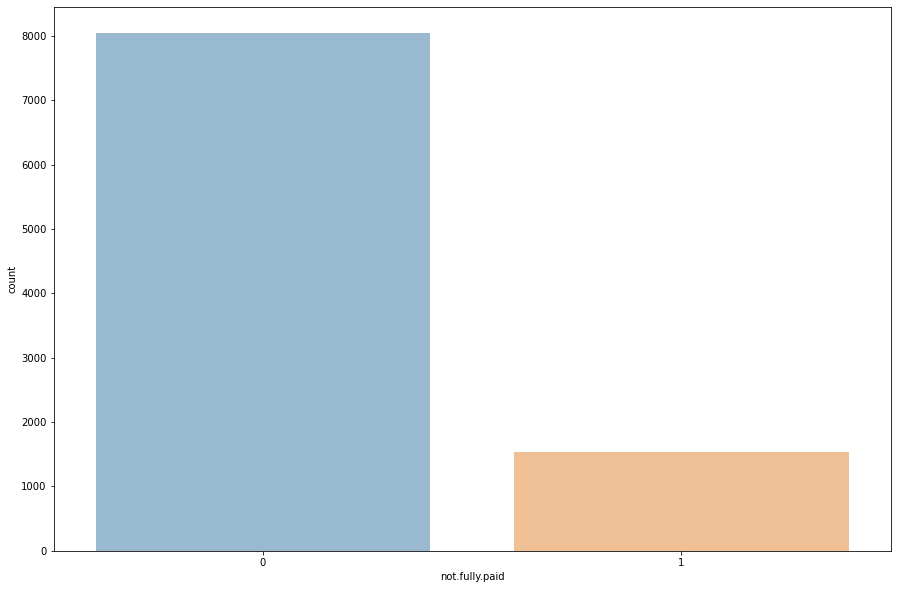

In [8]:
for i in data.columns :
    print('-'*50)
    print('col : ',i)
    plt.figure(figsize=(15,10))
    sns.countplot(x=i, data=data, alpha = 0.5)
    plt.show()

--------------------------------------------------
col :  int.rate


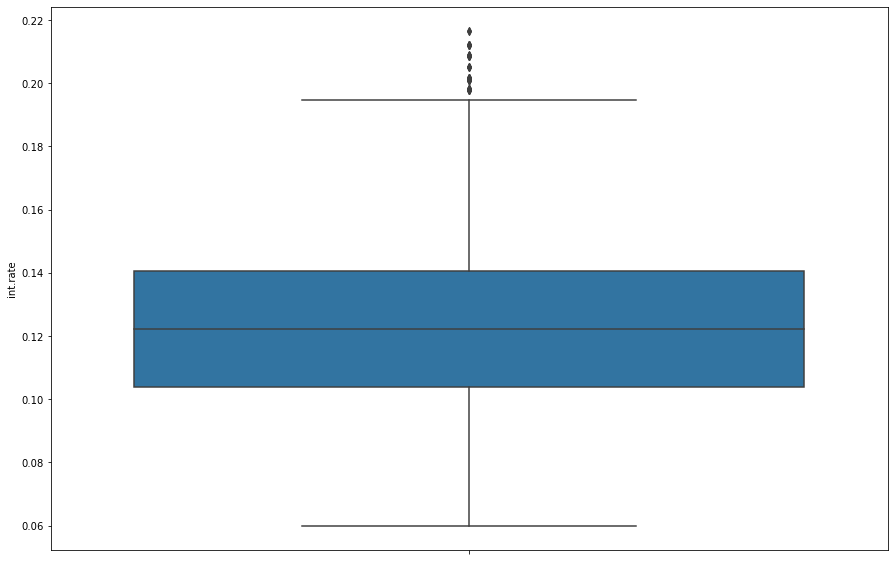

--------------------------------------------------
col :  installment


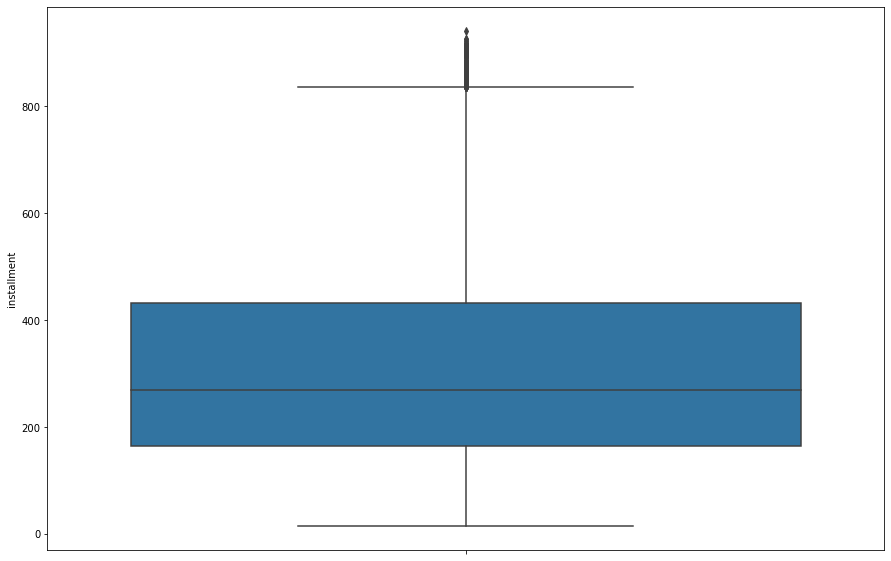

--------------------------------------------------
col :  log.annual.inc


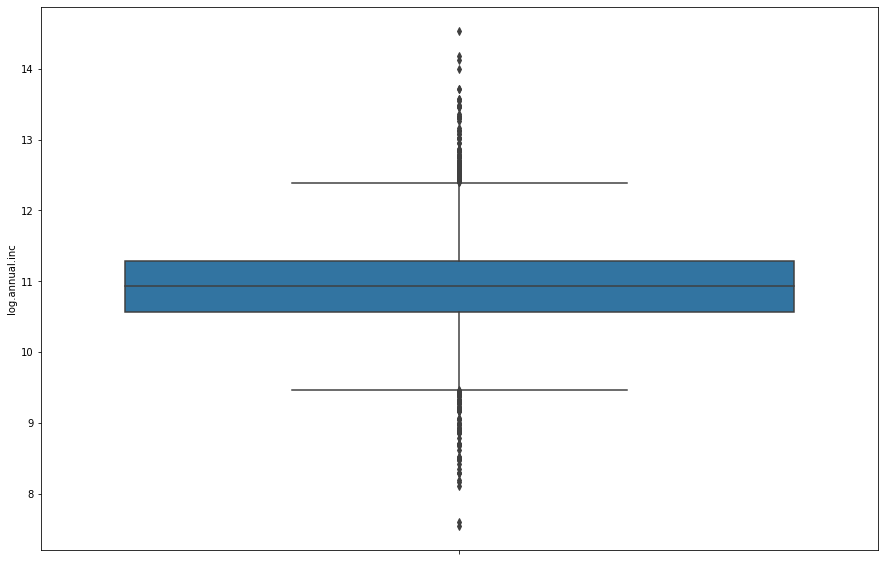

--------------------------------------------------
col :  dti


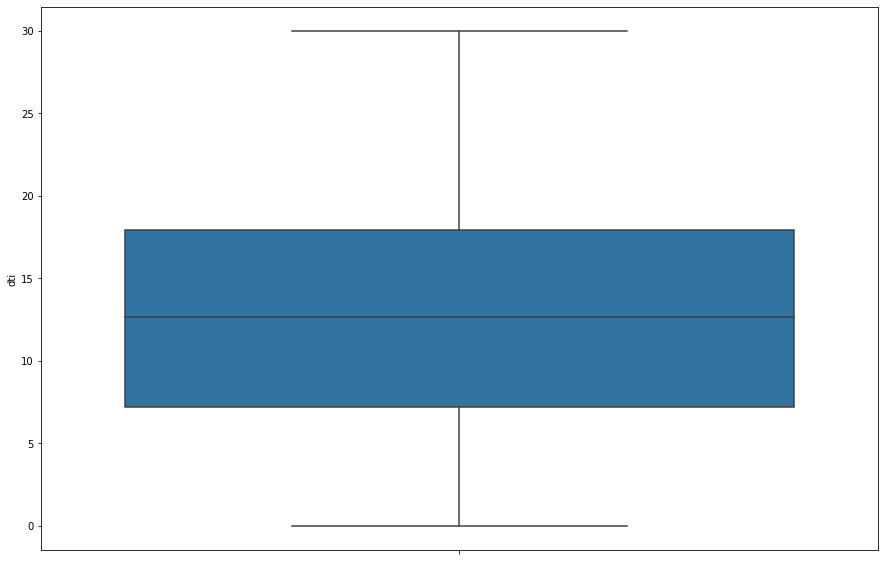

--------------------------------------------------
col :  fico


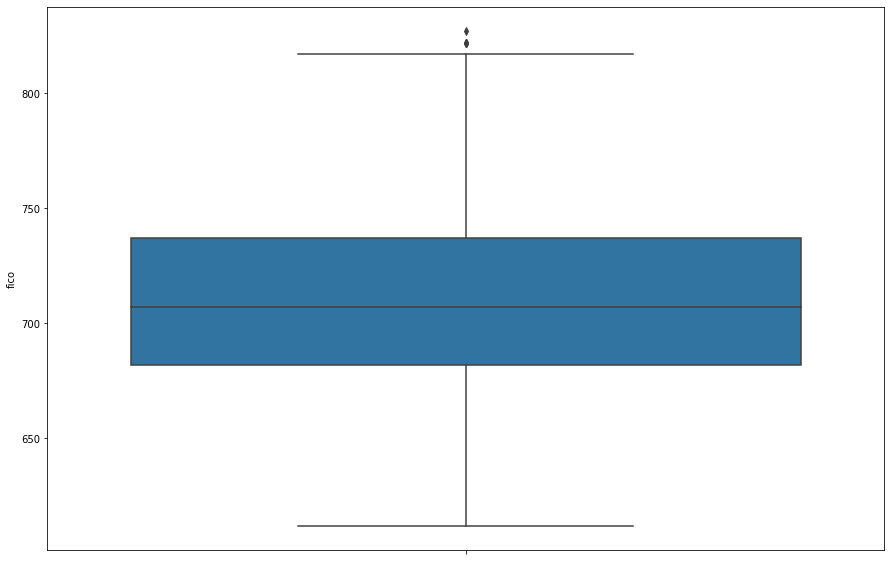

--------------------------------------------------
col :  days.with.cr.line


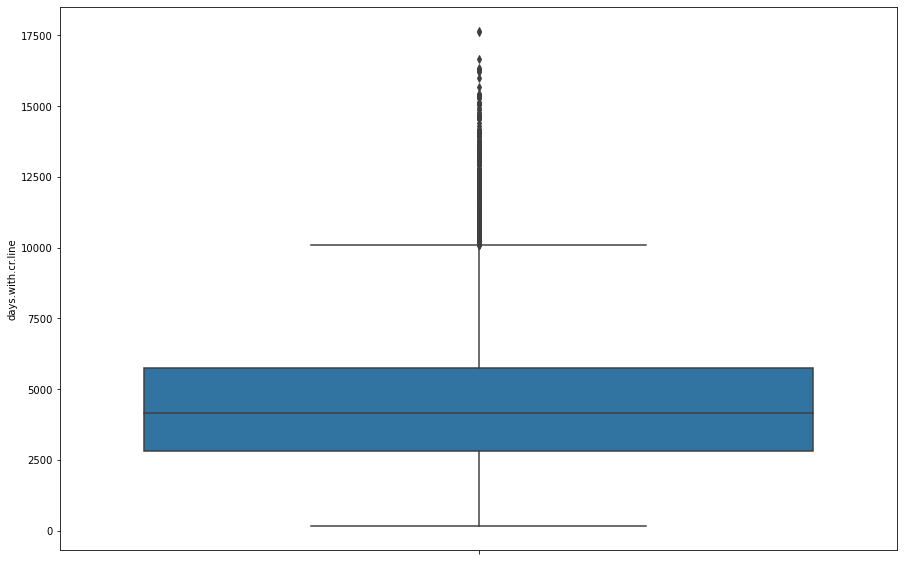

--------------------------------------------------
col :  revol.bal


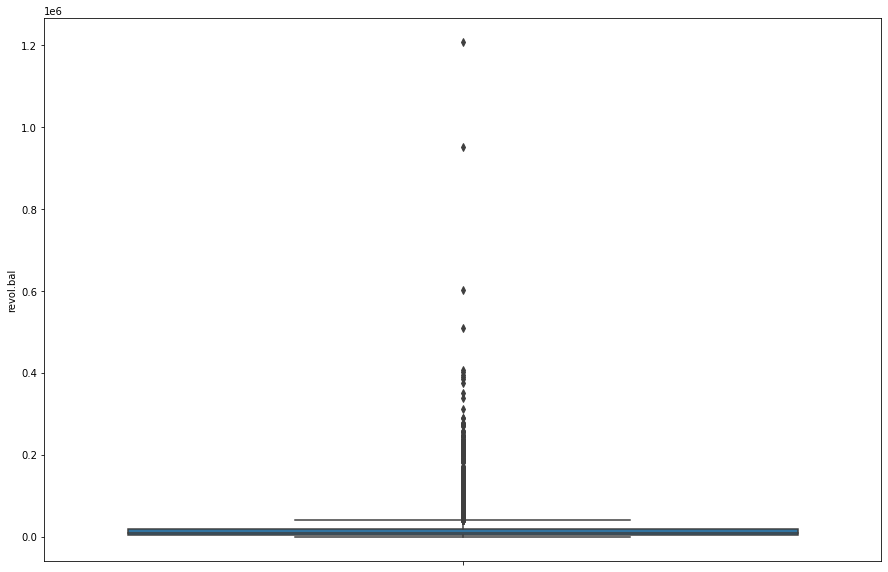

--------------------------------------------------
col :  revol.util


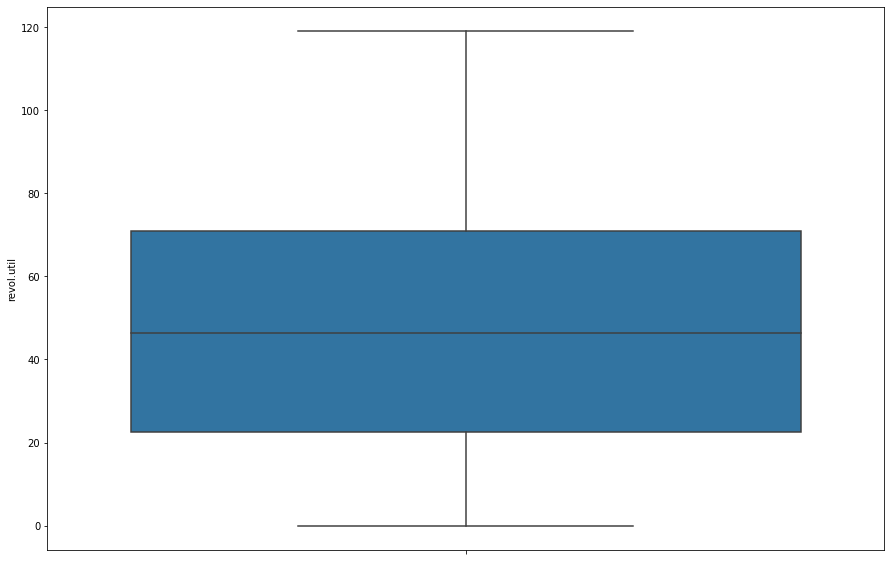

--------------------------------------------------
col :  inq.last.6mths


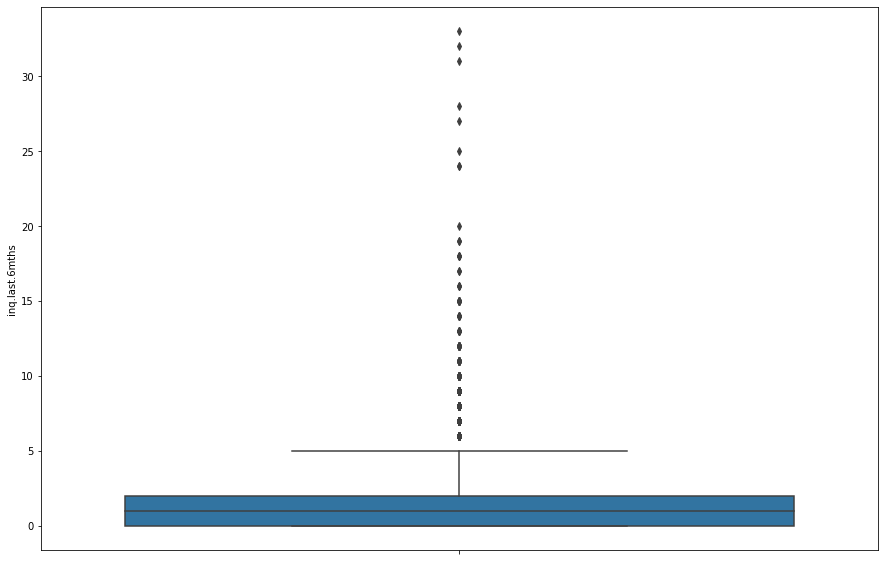

--------------------------------------------------
col :  delinq.2yrs


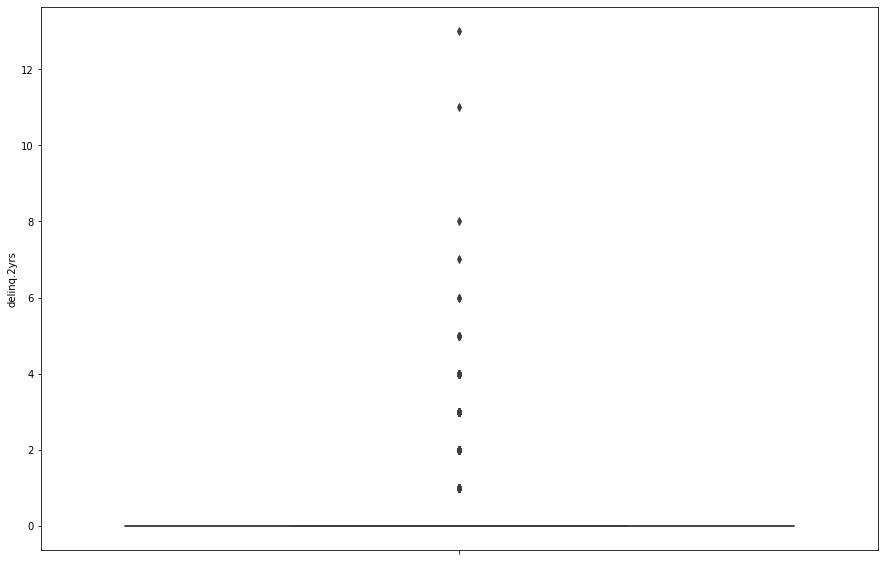

--------------------------------------------------
col :  pub.rec


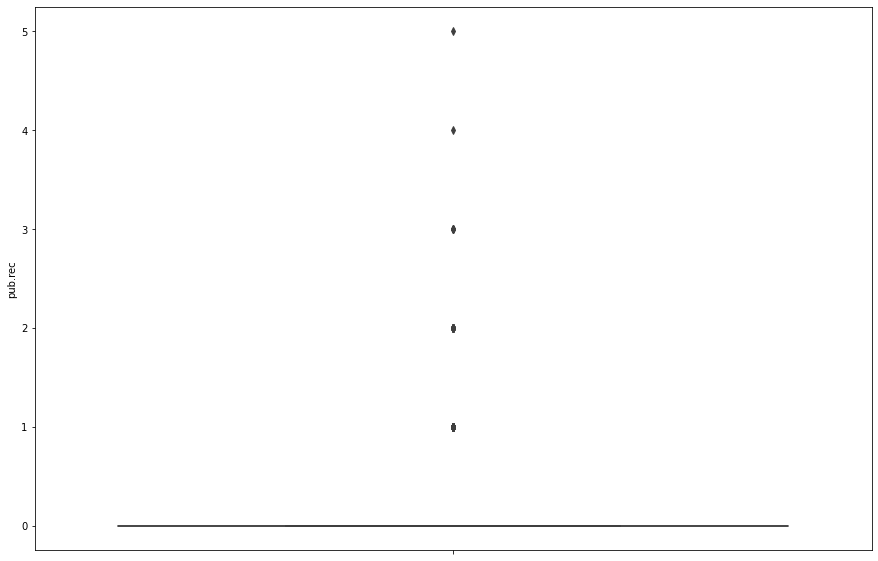

--------------------------------------------------
col :  not.fully.paid


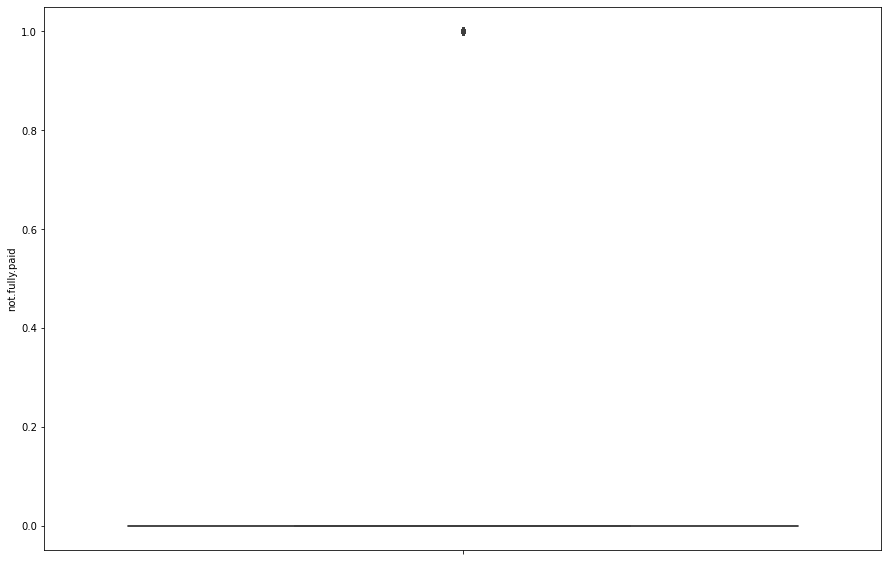

In [9]:
for i in data.columns :
    if data[i].dtype in ['O'] :
        continue
    
    print('-'*50)
    print('col : ', i)
    
    plt.figure(figsize = (15,10))
    sns.boxplot(y=i, data=data)
    plt.show()

# Logi Reg

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from patsy import dmatrices
import statsmodels.api as sm;
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\BIS_COM\과제\loan_data.csv")

data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [20]:
data['purpose'] = data['purpose'].map({'debt_consolidation':0,
                                             'all_other':1,'credit_card':2,
                                             'home_improvement' : 3,
                                             'small_business' : 4,
                                             'major_purchase' : 5,
                                             'educational' : 6,
                                            })

In [21]:
data = data[data['days.with.cr.line']<=5730.00]

In [22]:
from sklearn.model_selection import train_test_split
 
# x(독립변수) y(종속 변수) 분리
x = data.loc[:,'credit.policy':'pub.rec']
y = data['not.fully.paid']
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
check = pd.DataFrame(data=x)
check.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,2,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,2,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
 
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
 
x2 = sm.add_constant(x)
model = sm.OLS(y, x2)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(x_test)
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:         not.fully.paid   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     29.93
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           5.46e-73
Time:                        18:14:41   Log-Likelihood:                -2856.3
No. Observations:                7186   AIC:                             5741.
Df Residuals:                    7172   BIC:                             5837.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.3770      0.19

In [14]:
result.params

const                1.152737e+00
credit.policy       -5.637273e-02
purpose              9.958255e-03
int.rate             6.116464e-01
installment          1.385434e-04
log.annual.inc      -5.110062e-02
dti                 -8.714240e-04
fico                -7.869573e-04
days.with.cr.line    1.737178e-06
revol.bal            5.040619e-07
revol.util           1.607824e-04
inq.last.6mths       1.536480e-02
delinq.2yrs         -1.254657e-02
pub.rec              3.787505e-02
dtype: float64

In [15]:
# cnf_metrix = metrics.confusion_matrix(y_test, y_pred)
# print(cnf_metrix)
 
# class_names = ['Fully Paid', 'Not Fully Paid']
# fig, ax = plt.subplots()
# tick_marks = np.arange(len(class_names))
# plt.xticks(tick_marks, class_names)
# plt.yticks(tick_marks, class_names)
 
# 
# sns.heatmap(pd.DataFrame(cnf_metrix), annot=True, cmap='YlGnBu', fmt='g')
# ax.xaxis.set_label_position("top")
# plt.tight_layout()
# plt.title("Confusion matrix", y=1.1)
# plt.ylabel("Actual label")
# plt.xlabel("Predict label")
# plt.show()

In [16]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix,precision_recall_curve, roc_curve, auc

def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test,y_pred)

오차 행렬
[[2011    3]
 [ 379    2]]
정확도: 0.8405, 정밀도: 0.4000, 재현율: 0.0052,    F1: 0.0104, AUC:0.5019


C:\Users\BIS_COM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52964 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BIS_COM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BIS_COM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BIS_COM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BIS_COM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BIS_COM\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51116 mi

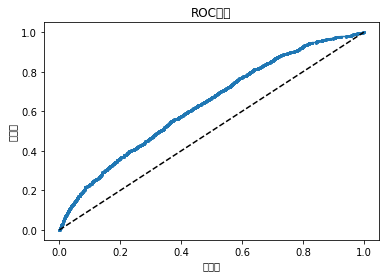

AUC : 0.6353002254555169


In [17]:
fpr, tpr, threshold = roc_curve(y_train, log_reg.decision_function(x_train))

plt.plot(fpr, tpr, 'o-', ms = 2, label="로지스틱 회귀")
plt.legend
plt.plot([0,1],[0,1], 'k--', label="abs")
plt.xlabel('특이도')
plt.ylabel('재현율')
plt.title('ROC커브')
plt.show()

print('AUC : {}'.format(auc(fpr, tpr)))

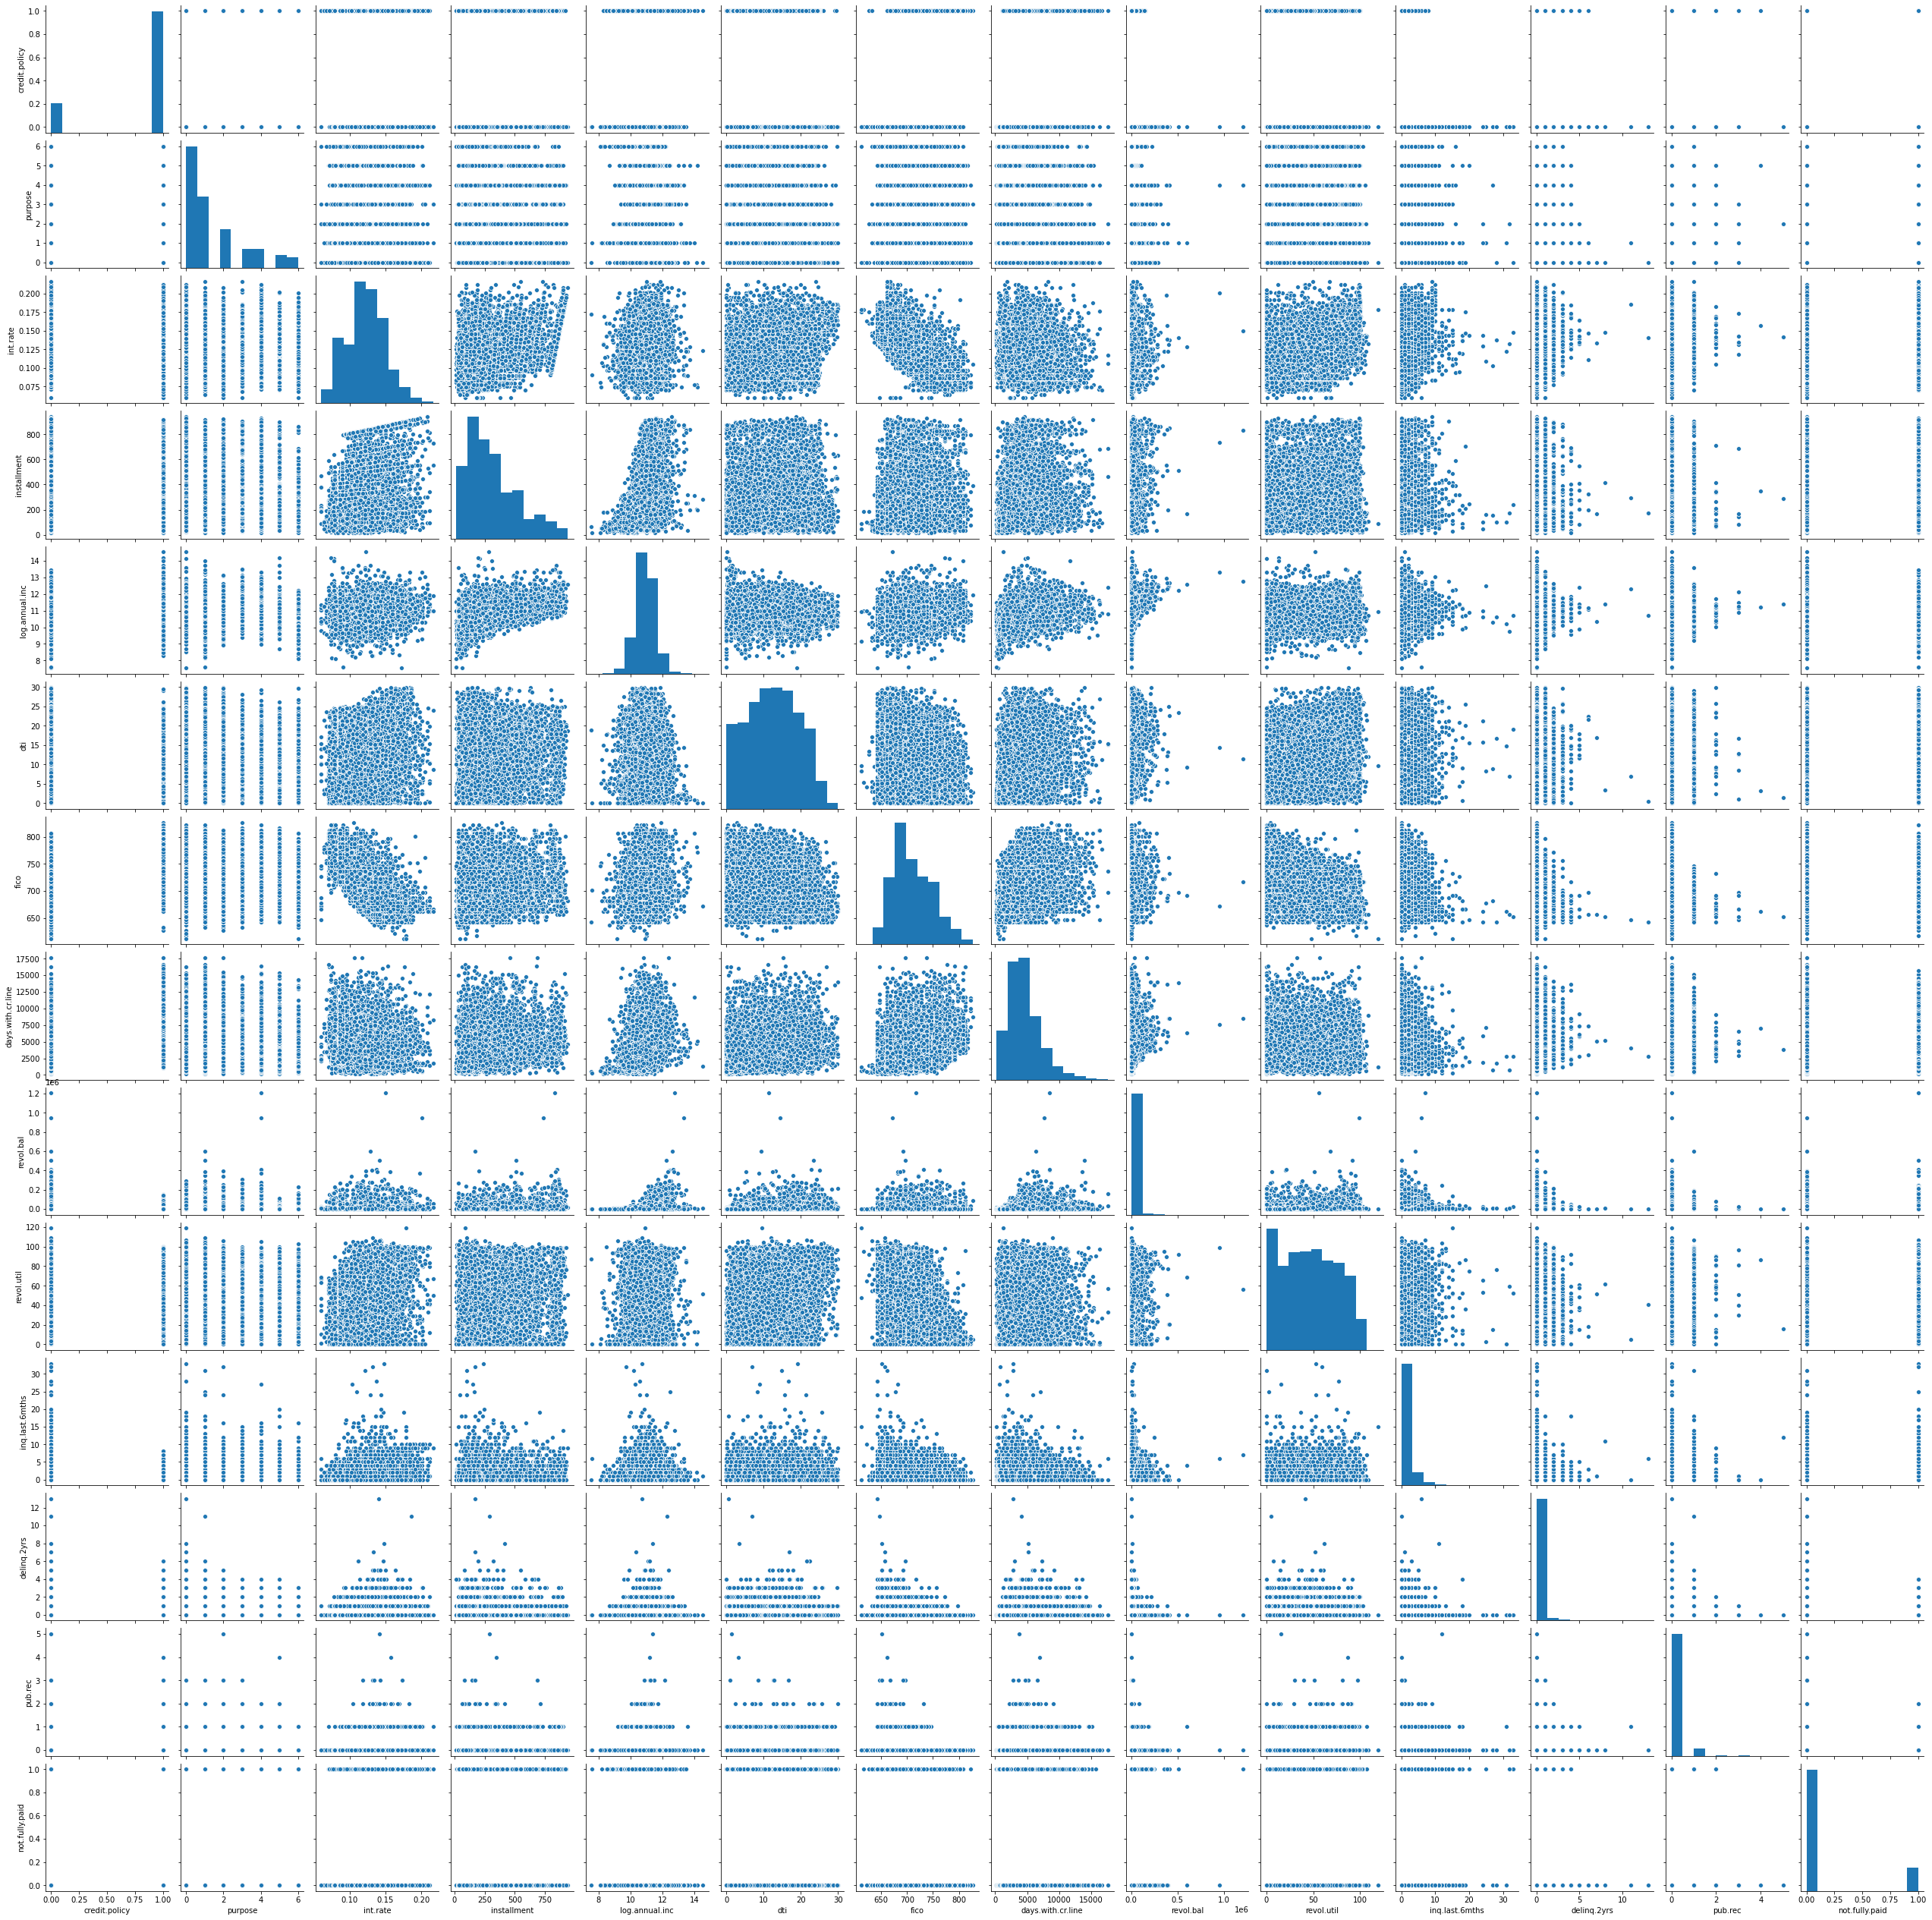

In [18]:
sns.pairplot(data)

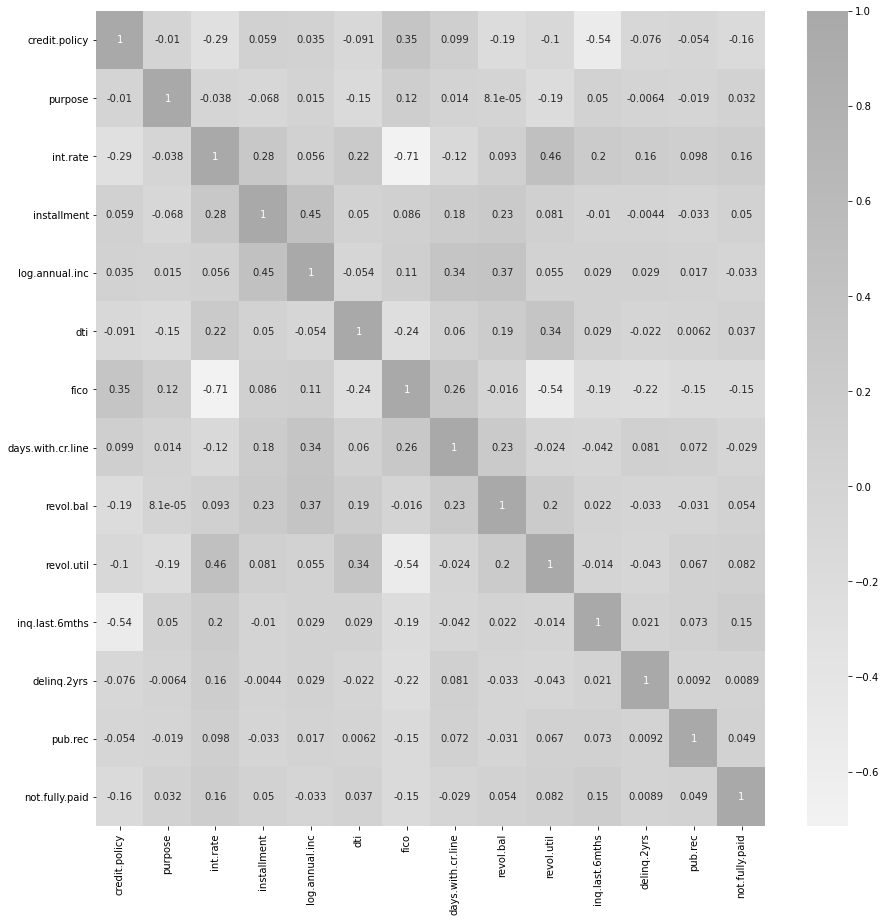

In [19]:
plt.figure(figsize=(15, 15))
cmap = sns.light_palette("darkgray", as_cmap = True)  
sns.heatmap(data.corr(), annot = True, cmap = cmap)
plt.show()

In [20]:
data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,2,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,2,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [21]:
x = x.drop("fico",axis=1)

In [22]:
x

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,0,0.1189,829.10,11.350407,19.48,5639.958333,28854,52.1,0,0,0
1,1,2,0.1071,228.22,11.082143,14.29,2760.000000,33623,76.7,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,4710.000000,3511,25.6,1,0,0
3,1,0,0.1008,162.34,11.350407,8.10,2699.958333,33667,73.2,1,0,0
4,1,2,0.1426,102.92,11.299732,14.97,4066.000000,4740,39.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,1,0.1461,344.76,12.180755,10.39,10474.000000,215372,82.1,2,0,0
9574,0,1,0.1253,257.70,11.141862,0.21,4380.000000,184,1.1,5,0,0
9575,0,0,0.1071,97.81,10.596635,13.09,3450.041667,10036,82.9,8,0,0
9576,0,3,0.1600,351.58,10.819778,19.18,1800.000000,0,3.2,5,0,0


In [23]:
from sklearn.model_selection import train_test_split
 
# x(독립변수) y(종속 변수) 분리
x = x.loc[:,'credit.policy':'pub.rec']
y = data['not.fully.paid']
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
check = pd.DataFrame(data=x)
check.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,0,0.1189,829.10,11.350407,19.48,5639.958333,28854,52.1,0,0,0
1,1,2,0.1071,228.22,11.082143,14.29,2760.000000,33623,76.7,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,4710.000000,3511,25.6,1,0,0
3,1,0,0.1008,162.34,11.350407,8.10,2699.958333,33667,73.2,1,0,0
4,1,2,0.1426,102.92,11.299732,14.97,4066.000000,4740,39.5,0,1,0


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
 
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
 
x2 = sm.add_constant(x)
model = sm.OLS(y, x2)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(x_test)
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:         not.fully.paid   R-squared:                       0.053
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     44.40
Date:                Sat, 12 Dec 2020   Prob (F-statistic):          2.20e-103
Time:                        14:06:47   Log-Likelihood:                -3721.1
No. Observations:                9578   AIC:                             7468.
Df Residuals:                    9565   BIC:                             7561.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.5258      0.08

C:\Users\BIS_COM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# RF

In [25]:
data = pd.read_csv(r"C:\Users\BIS_COM\과제\loan_data.csv")

In [26]:
data['purpose'] = data['purpose'].map({'debt_consolidation':0,
                                             'all_other':1,'credit_card':2,
                                             'home_improvement' : 3,
                                             'small_business' : 4,
                                             'major_purchase' : 5,
                                             'educational' : 6,
                                            })

In [27]:
from sklearn.model_selection import train_test_split
 
# x(독립변수) y(종속 변수) 분리
x = data.loc[:,'credit.policy':'pub.rec']
y = data['not.fully.paid']
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
check = pd.DataFrame(data=x)
check.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,2,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,2,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [28]:
from sklearn.ensemble import RandomForestClassifier
import mglearn

forest = RandomForestClassifier()
forest.fit(x_train, y_train)

y_pred = forest.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.838830897703549


In [29]:
from sklearn.model_selection import KFold, GridSearchCV

rf_param_grid = {
    'n_estimators' : [100,200],
    'max_depth' : [2,4,6,8,10,12],
    'min_samples_leaf' : [3,5,7,10],
    'min_samples_split' : [2,3,5,10]
}

In [30]:
rf_grid = GridSearchCV(forest, param_grid = rf_param_grid, scoring="accuracy",
                      n_jobs = -1, verbose = 1)
rf_grid.fit(x_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  1.6min finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_leaf': [3, 5, 7, 10],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [31]:
print("Best Accuracy : {0:.4f}".format(rf_grid.best_score_))
print("Best Param : ", rf_grid.best_params_)

Best Accuracy : 0.8403
Best Param :  {'max_depth': 12, 'min_samples_leaf': 7, 'min_samples_split': 10, 'n_estimators': 100}


In [32]:
scores = pd.DataFrame(rf_grid.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.390044,0.013016,0.026405,0.002173,2,3,2,100,"{'max_depth': 2, 'min_samples_leaf': 3, 'min_s...",0.839944,0.839248,0.839248,0.839833,0.839833,0.839621,0.000307,91
1,0.792478,0.014783,0.050363,0.006715,2,3,2,200,"{'max_depth': 2, 'min_samples_leaf': 3, 'min_s...",0.839944,0.839248,0.839248,0.839833,0.839833,0.839621,0.000307,91
2,0.404932,0.018822,0.025507,0.002005,2,3,3,100,"{'max_depth': 2, 'min_samples_leaf': 3, 'min_s...",0.839944,0.839248,0.839248,0.839833,0.839833,0.839621,0.000307,91
3,0.788164,0.022526,0.050491,0.014351,2,3,3,200,"{'max_depth': 2, 'min_samples_leaf': 3, 'min_s...",0.839944,0.839248,0.839248,0.839833,0.839833,0.839621,0.000307,91
4,0.383782,0.006663,0.022994,0.000641,2,3,5,100,"{'max_depth': 2, 'min_samples_leaf': 3, 'min_s...",0.839944,0.839248,0.839248,0.839833,0.839833,0.839621,0.000307,91


In [33]:
scores.sort_values(by=['rank_test_score'], inplace=True)
scores[['params','mean_test_score','rank_test_score']].head()

,params,mean_test_score,rank_test_score
182,"{'max_depth': 12, 'min_samples_leaf': 7, 'min_...",0.840318,1
160,"{'max_depth': 12, 'min_samples_leaf': 3, 'min_...",0.840317,2
173,"{'max_depth': 12, 'min_samples_leaf': 5, 'min_...",0.840317,2
115,"{'max_depth': 8, 'min_samples_leaf': 7, 'min_s...",0.840178,4
183,"{'max_depth': 12, 'min_samples_leaf': 7, 'min_...",0.840178,4


In [34]:
best_score = scores.loc[174,['params']]
best_score = best_score.tolist()
best_score

[{'max_depth': 12,
  'min_samples_leaf': 5,
  'min_samples_split': 10,
  'n_estimators': 100}]

In [35]:
forest = RandomForestClassifier(max_depth=12,
  min_samples_leaf=5,
  min_samples_split= 10,
  n_estimators= 100)
forest.fit(x_train, y_train)

y_pred = forest.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8400835073068893


In [36]:
feature = forest.feature_importances_
type(feature)

numpy.ndarray

In [37]:
ft_importance = pd.Series(feature, index = x_train.columns)
ft_importance = ft_importance.sort_values(ascending=False)

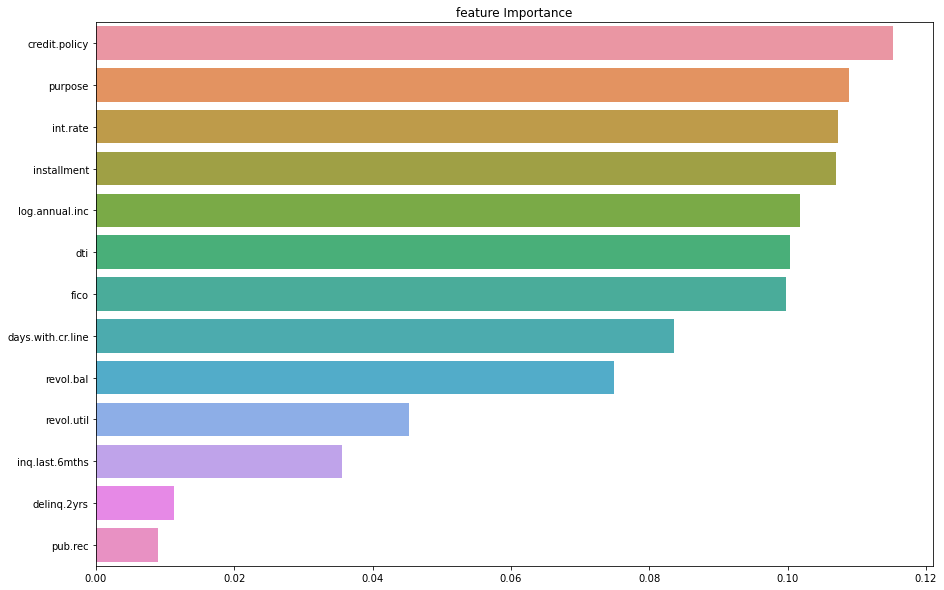

In [38]:
plt.figure(figsize=(15,10))
plt.title("feature Importance")
sns.barplot(x=ft_importance, y=x_train.columns)
plt.show()

In [39]:
print(ft_importance)
best_feature = pd.DataFrame(data=ft_importance,)
# best_feature = best_feature[:,:8].columns
# print(best_feature)
best_feature = best_feature.T.columns[:8]

int.rate             0.115221
log.annual.inc       0.108876
installment          0.107310
revol.util           0.107043
days.with.cr.line    0.101788
revol.bal            0.100405
dti                  0.099739
fico                 0.083610
inq.last.6mths       0.074879
credit.policy        0.045324
purpose              0.035574
pub.rec              0.011305
delinq.2yrs          0.008926
dtype: float64


In [40]:
 # x(독립변수) y(종속 변수) 분리
x = data.loc[:,best_feature]
y = data['not.fully.paid']
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
check = pd.DataFrame(data=x)
check.head()

,int.rate,log.annual.inc,installment,revol.util,days.with.cr.line,revol.bal,dti,fico
0,0.1189,11.350407,829.10,52.1,5639.958333,28854,19.48,737
1,0.1071,11.082143,228.22,76.7,2760.000000,33623,14.29,707
2,0.1357,10.373491,366.86,25.6,4710.000000,3511,11.63,682
3,0.1008,11.350407,162.34,73.2,2699.958333,33667,8.10,712
4,0.1426,11.299732,102.92,39.5,4066.000000,4740,14.97,667


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm
 
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
 
x2 = sm.add_constant(x)
model = sm.OLS(y, x2)
result = model.fit()
print(result.summary())
 
y_pred = log_reg.predict(x_test)
print('정확도 :', metrics.accuracy_score(y_test, y_pred))

                            OLS Regression Results                            
Dep. Variable:         not.fully.paid   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     43.52
Date:                Sat, 12 Dec 2020   Prob (F-statistic):           4.40e-69
Time:                        14:08:27   Log-Likelihood:                -3809.5
No. Observations:                9578   AIC:                             7637.
Df Residuals:                    9569   BIC:                             7702.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2170      0.15

# D/L

In [42]:
import pandas as pd

data = pd.read_csv(r"C:\Users\BIS_COM\과제\loan_data.csv")

In [43]:
data['purpose'] = data['purpose'].map({'debt_consolidation':0,
                                             'all_other':1,'credit_card':2,
                                             'home_improvement' : 3,
                                             'small_business' : 4,
                                             'major_purchase' : 5,
                                             'educational' : 6,
                                            })

In [44]:
from sklearn.model_selection import train_test_split
 
# x(독립변수) y(종속 변수) 분리
x = data.loc[:,'credit.policy':'pub.rec']
y = data['not.fully.paid']
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
check = pd.DataFrame(data=x)
check.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,2,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,2,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [24]:
import tensorflow as tf
from keras import layers, models

batch_size = 64
epochs = 25
print(x_train.shape)
print(y_train.shape)

(5389, 13)
(5389,)


In [25]:
# def make_model(input_number, hidden_layers, output_number):
#     model = models.Sequential()
#     model.add(layers.Dense(hidden_layers[0], activtion='relu',
#                            input_shape=(input_number,))
# #     model.add(layers.Dropout(0.2))
#     model.add(layers.Dense(output_number, activtion='softmax'))
#     model.compile(loss='categorical_crossentropy', optimizer='adam',
#                  metrics=['accuracy'])
#         return model

In [26]:
model = tf.keras.models.Sequential()
model.add(layers.Dense(units=128, activation='relu',input_shape=(13,)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1792      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 2,050
Trainable params: 2,050
Non-trainable params: 0
_________________________________________________________________


In [27]:
tf.keras.utils.plot_model(model, to_file='model_plot.png',show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [28]:
model.compile(optimizer='sgd', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
)

In [29]:
# model.compile(
#     optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, 
#                                    nesterov=True), 
#     loss=keras.losses.sparse_categorical_crossentropy
# )

In [30]:
history=model.fit(x_train, y_train, 
          epochs=100, 
          verbose=1, 
          validation_split=0.25)

Epoch 1/100
127/127 [==============================] - 0s 2ms/step - loss: 36222.9961 - accuracy: 0.8280 - val_loss: 0.5316 - val_accuracy: 0.8323
Epoch 2/100
127/127 [==============================] - 0s 903us/step - loss: 0.4984 - accuracy: 0.8406 - val_loss: 0.4809 - val_accuracy: 0.8316
Epoch 3/100
127/127 [==============================] - 0s 864us/step - loss: 0.4601 - accuracy: 0.8416 - val_loss: 0.4628 - val_accuracy: 0.8323
Epoch 4/100
127/127 [==============================] - 0s 889us/step - loss: 0.4471 - accuracy: 0.8419 - val_loss: 0.4563 - val_accuracy: 0.8323
Epoch 5/100
127/127 [==============================] - 0s 895us/step - loss: 0.4425 - accuracy: 0.8414 - val_loss: 0.4535 - val_accuracy: 0.8323
Epoch 6/100
127/127 [==============================] - 0s 856us/step - loss: 0.4397 - accuracy: 0.8409 - val_loss: 0.4525 - val_accuracy: 0.8323
Epoch 7/100
127/127 [==============================] - 0s 880us/step - loss: 0.4378 - accuracy: 0.8411 - val_loss: 0.4522 - val_

127/127 [==============================] - 0s 762us/step - loss: 0.4368 - accuracy: 0.8414 - val_loss: 0.4525 - val_accuracy: 0.8323
Epoch 58/100
127/127 [==============================] - 0s 738us/step - loss: 0.4365 - accuracy: 0.8419 - val_loss: 0.4526 - val_accuracy: 0.8323
Epoch 59/100
127/127 [==============================] - 0s 762us/step - loss: 0.4368 - accuracy: 0.8416 - val_loss: 0.4526 - val_accuracy: 0.8323
Epoch 60/100
127/127 [==============================] - 0s 785us/step - loss: 0.4365 - accuracy: 0.8416 - val_loss: 0.4525 - val_accuracy: 0.8323
Epoch 61/100
127/127 [==============================] - 0s 730us/step - loss: 0.4366 - accuracy: 0.8419 - val_loss: 0.4525 - val_accuracy: 0.8323
Epoch 62/100
127/127 [==============================] - 0s 754us/step - loss: 0.4365 - accuracy: 0.8416 - val_loss: 0.4525 - val_accuracy: 0.8323
Epoch 63/100
127/127 [==============================] - 0s 691us/step - loss: 0.4365 - accuracy: 0.8419 - val_loss: 0.4538 - val_accuracy

In [31]:
model.evaluate(x_test, y_test)

57/57 [==============================] - 0s 350us/step - loss: 0.4600 - accuracy: 0.8297


[0.4600165784358978, 0.8297162055969238]

In [32]:
preds = model.predict(x_test, batch_size=128)
preds[0]

array([0.84242433, 0.15757568], dtype=float32)

In [33]:
import numpy as np

np.argmax(preds[0])

0

In [55]:
history = history.history['val_loss']

In [56]:
# 도화지 생성
fig = plt.figure()
# 정확도 그래프 그리기
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
# 축 이름
plt.grid(linestyle='--', color='lavender')
plt.legend(['train','test'])
# 그래프 표시
plt.show()

AttributeError: 'list' object has no attribute 'history'

<Figure size 432x288 with 0 Axes>

# XGBoost

In [1]:
import pandas as pd
from xgboost import plot_importance
from xgboost import XGBClassifier


data = pd.read_csv(r"C:\Users\BIS_COM\과제\loan_data.csv")

In [2]:
data['purpose'] = data['purpose'].map({'debt_consolidation':0,
                                             'all_other':1,'credit_card':2,
                                             'home_improvement' : 3,
                                             'small_business' : 4,
                                             'major_purchase' : 5,
                                             'educational' : 6,
                                            })

In [3]:
from sklearn.model_selection import train_test_split
 
# x(독립변수) y(종속 변수) 분리
x = data.loc[:,'credit.policy':'pub.rec']
y = data['not.fully.paid']
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
check = pd.DataFrame(data=x)
check.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,2,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,2,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [7]:
xgb = XGBClassifier(n_estimators = 500, learning_rate = 0.1, max_depth = 4)
evals = [(x_test,y_test)]
xgb.fit(x_train, y_train, early_stopping_rounds = 100, eval_metric = "logloss",
       eval_set = evals, verbose=0)
xgb_pred = xgb.predict(x_test)
accuracy = accuracy_score(y_test , xgb_pred)
print(accuracy)

C:\Users\BIS_COM\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.8409185803757829


In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix,precision_recall_curve, roc_curve, auc

def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test,xgb_pred)

오차 행렬
[[2008    6]
 [ 375    6]]
정확도: 0.8409, 정밀도: 0.5000, 재현율: 0.0157,    F1: 0.0305, AUC:0.5064


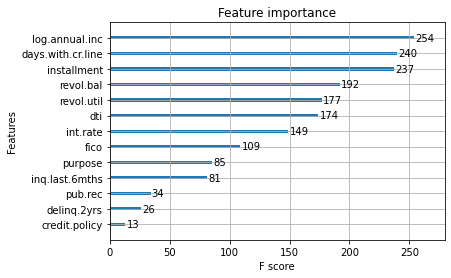

In [11]:
fig, ax = plt.subplots()
plot_importance (xgb,ax=ax)

In [12]:
from sklearn.model_selection import KFold, GridSearchCV

xgb_param_grid = {
    'n_estimators' : [500,1000],
    'max_depth' : [2,6,12],
    'learning_rate' : [0.1,0.15,0.2,0.25],
#     'min_child_weight' : [0.1,0.15,0.2,0.25],
#     'max_delta_step' : [2, 3, 5, 10],
#     'num_parallel_tree' : [2, 3, 5, 10]
}

In [13]:
xgb_grid = GridSearchCV(xgb, param_grid = xgb_param_grid, scoring="accuracy",
                      n_jobs = -1, verbose = 1)
xgb_grid.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.7min finished
C:\Users\BIS_COM\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=4, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=500, n_jobs=12,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                     verbosity=None),
             n_job

In [14]:
print("Best Accuracy : {0:.4f}".format(xgb_grid.best_score_))
print("Best Param : ", xgb_grid.best_params_)

Best Accuracy : 0.8368
Best Param :  {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 500}


In [15]:
scores = pd.DataFrame(xgb_grid.cv_results_)
scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.427216,0.211848,0.008776,0.001323,0.1,2,500,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.839944,0.842728,0.835769,0.835655,0.830084,0.836836,0.004301,1
1,7.729403,0.074217,0.009973,0.002092,0.1,2,1000,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.839248,0.836465,0.837161,0.832173,0.827298,0.834469,0.004261,4
2,10.713252,0.364548,0.006981,0.001092,0.1,6,500,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.824635,0.824635,0.835073,0.823120,0.825209,0.826534,0.004325,11
3,20.304659,0.169947,0.012468,0.002712,0.1,6,1000,"{'learning_rate': 0.1, 'max_depth': 6, 'n_esti...",0.815588,0.819763,0.829506,0.823120,0.820334,0.821662,0.004602,21
4,21.946956,0.481660,0.010872,0.001794,0.1,12,500,"{'learning_rate': 0.1, 'max_depth': 12, 'n_est...",0.832289,0.832289,0.834377,0.826602,0.827298,0.830571,0.003061,7


In [16]:
scores.sort_values(by=['rank_test_score'], inplace=True)
scores[['params','mean_test_score','rank_test_score']].head()

,params,mean_test_score,rank_test_score
0,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.836836,1
6,"{'learning_rate': 0.15, 'max_depth': 2, 'n_est...",0.835862,2
12,"{'learning_rate': 0.2, 'max_depth': 2, 'n_esti...",0.834608,3
1,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.834469,4
7,"{'learning_rate': 0.15, 'max_depth': 2, 'n_est...",0.831546,5


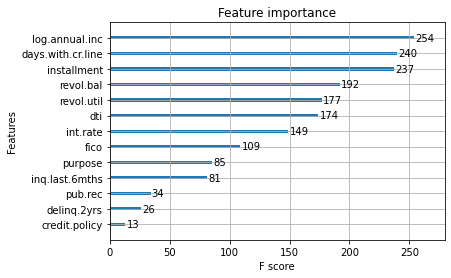

In [17]:
fig, ax = plt.subplots()
plot_importance (xgb,ax=ax)